In [4]:
#import important basics libraries
import os
import numpy as np      #linear algebra
import pandas as pd     #data processing, I/O files
import seaborn as sns            #For Data Visualization


#import important visualization libraries   
import matplotlib.pylab as plot  #For Data Visualization
%matplotlib inline
import plotly.figure_factory as figuref


#provides a way to control warning
import warnings                  #for ignoring warnings
warnings.filterwarnings("ignore")

import json
import shutil               #use it to perform a variety of file and directory operations, such as copying, moving, and deleting files and directories


In [5]:
#import important machine learning libraries
import sklearn                                               #ML library provides a wide range of tools

from sklearn.model_selection import train_test_split         #function in scikit-learn,used to split a dataset into a training set and a test set
from sklearn.metrics import accuracy_score                   #to gorge model's effectiveness by calculating the ratio of total TP to total TN across all the model prediction
from sklearn.metrics import classification_report            

from sklearn.feature_extraction.text import CountVectorizer #for converting a collection of text documents to a matrix of word counts
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF, converting a collection of text documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.linear_model import LogisticRegression     #LR 
from sklearn.naive_bayes import MultinomialNB           #NB
from sklearn.svm import LinearSVC , SVC                 #SVC
from sklearn.neighbors import KNeighborsClassifier      #k-nearest neighbor algorithm (KNN)
from sklearn.tree import DecisionTreeClassifier         #DT
from sklearn.ensemble import RandomForestClassifier     #RF

from sklearn import metrics                             #module proides variety of metrics for evaluating the performance of ML
from sklearn.metrics import confusion_matrix            #confusion matrix
from sklearn.metrics import roc_auc_score               #ROC curve, which is measure of the performance of a binary classifier
from sklearn.metrics import roc_curve                   #ROC curve, which is plot of the true positive rate (TP) against the false positive rate (FP)


In [6]:
import gensim               #for word2vec, powerful library unsupervised model, used in Word2Vec and GloVe, to learn word embeddin,or a variety of other NLP tasks
#word2vec libraries
from gensim.models.word2vec import Word2Vec                 #for extraction features


In [7]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)


import keras        #high-level API for building deep learning models, solve a wide variety of ML problems
from keras.models import Sequential                                 #class/model in Keras is used to create a linear stack of layers,build DL models,
from keras.layers import LSTM ,Conv1D, GlobalMaxPool1D , MaxPooling1D, Bidirectional  #ALL are CNNs are a type of DL model,designed for processing and understanding images
from keras.layers import Embedding , Dense , BatchNormalization , Dropout   #for extracting features Embedding, Dense, Dropout 
from keras.initializers import Constant                            #initializer in Keras,used to initialize the weights of a layer to a constant value
from keras.optimizers import adam_v2                               #version 2 of adam optimizer in Keras, used to train dl models
from keras.layers.embeddings import Embedding       #submodule of the keras.layers module,its give access to all features for embedding including the pre-trained word embeddings
from keras.preprocessing.text import Tokenizer                     #powerful tool for preprocessing text data, use in Keras models
from keras.preprocessing.sequence import pad_sequences             #this function pads sequences to the same length. This is useful for training (RNNs).


2.8.0-rc1
2.8.0


In [8]:
#import the the nessary libraries for text preprocessing 
#NLTK libraries
import re                                                   #module for regular expressions, allow to determine wether given text fits given regular occupation
import string                                               #module for string operations, seves as the foundation of manipulating data

import nltk
import spacy                                                #for lemmatization
from nltk import corpus
from nltk.corpus import stopwords                           #use it for remove stop words in the english language
from nltk.tokenize import word_tokenize, sent_tokenize      #tokenizing words
from wordcloud import WordCloud,STOPWORDS                   #wordcloud for generating text clouds

from nltk import bigrams


In [9]:
#read dataset of the fake and true news
ds_true= pd.read_csv('../data/True.csv')
ds_fake= pd.read_csv('../data/Fake.csv')


In [10]:
#get shape and head of the true news dataframe
print ("The shape of the  data is (row, column):"+ str(ds_true.shape))
ds_true.head()


The shape of the  data is (row, column):(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
#get shape and head of the fake news dataframe
print ("The shape of the  data is (row, column):"+ str(ds_fake.shape))
ds_fake.head()


The shape of the  data is (row, column):(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
#print the dataset inforamtion
print (ds_true.info())
print('\n ______________________ \n')
print (ds_fake.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

 ______________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [13]:
#check if there are any value in a column is null
ds_true.isnull().sum()
ds_fake.isnull().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
#Setting up a target variable and combining both the real and fake news datasets
ds_true['target'] = 1          #set the target column in true news dataframe to 1
ds_fake['target'] = 0          #set the target column in fake news dataframe to 0

#creates a new dataframe called new_dsf that contains all of the data from the ds_true and ds_fake dataframes
all_ds_news = pd.concat([ds_true, ds_fake], ignore_index=True).reset_index(drop = True)   

#creat new column 'orginal' contains the title and text of the news together.
all_ds_news['original'] = all_ds_news['title'] + ' ' + all_ds_news['text']
all_ds_news.head(44000)             #show the new_dsf dataframe


,title,text,subject,date,target,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
43995,BOILER ROOM – EP #55 – Roasting the Wretched H...,Tune in to the Alternate Current Radio Network...,US_News,"May 4, 2016",0,BOILER ROOM – EP #55 – Roasting the Wretched H...
43996,Cruz & Kasich Quit: Trump Crushes Elite Establ...,21st Century Wire says The field is now clear ...,US_News,"May 4, 2016",0,Cruz & Kasich Quit: Trump Crushes Elite Establ...
43997,False Flag Florida: FBI Agents ‘Posing As Terr...,21st Century Wire says The FBI is walking a ve...,US_News,"May 3, 2016",0,False Flag Florida: FBI Agents ‘Posing As Terr...
43998,Shock to The System: New Poll Says Trump CAN B...,21st Century Wire says This is the news that t...,US_News,"May 3, 2016",0,Shock to The System: New Poll Says Trump CAN B...


In [15]:
#check for any null value
all_ds_news.isnull().sum()


title       0
text        0
subject     0
date        0
target      0
original    0
dtype: int64

In [16]:
#prit new dataset information
print (all_ds_news.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   target    44898 non-null  int64 
 5   original  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB
None


Text(0, 0.5, 'Count')

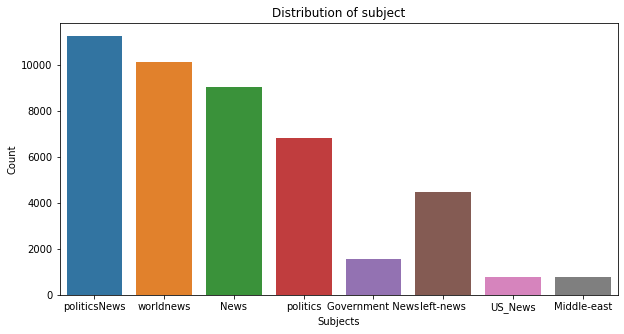

In [17]:
#creates a bar plot of the number of news articles for each subject

plot.figure(figsize=(10, 5))            #set the figure size.
plot.tight_layout()                     #ensures that the plot is not too cluttered
sns.countplot(all_ds_news['subject'])   #create a count plot of the subject.
plot.title('Distribution of subject')   #add a title to the plot
plot.xlabel("Subjects")                 #label to the x-axis
plot.ylabel("Count")                    #label to the y-axis


In [18]:
# target column 0 for fake, 1 for real
all_ds_news.target.value_counts()


0    23481
1    21417
Name: target, dtype: int64

The shape of the  data is (Row, Column):(44898, 6)



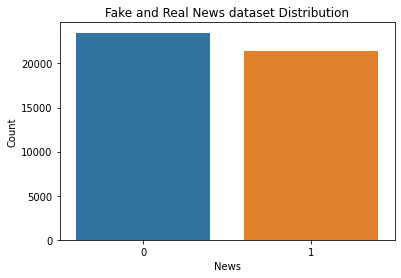

In [19]:
#print the shape of the DataFrame
print ("The shape of the  data is (Row, Column):"+ str(all_ds_news.shape) + "\n")
sns.countplot(all_ds_news.target, label='0 Fake\n 1 Real' )         #create a countplot of the datafram
plot.title('Fake and Real News dataset Distribution')               #add a title to the plot

#add labels to the xaxis & yaxis
plot.xlabel('News')
plot.ylabel('Count')

plot.show()                                                         #show the plot

In [122]:
#INSTALLATION SpaCy 
nlp = spacy.load("en_core_web_lg")
#print components
nlp.pipe_names


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [20]:
#get the attribute_ruler pipe
ar = nlp.get_pipe('attribute_ruler')

#add a rule that maps "U.S." and "US" to the entity "united states"
ar.add([[{"TEXT":"U.S."}],[{"TEXT":"US"}]],{"LEMMA":"united states"})

In [21]:
#1 DATA PREPROCESSING  
#1.1 Data cleaning 

#remove non alphanumeric characters and converting all 'original' to lower case, reomove punctuation, links, numbers with words "no0r" the output "nor"
#create a def function to clean the data
def remove_and_clean_ds(text):
  text = text.lower()               #convert all 'original' to lower case
  regex = r"\d+"                    #remove numbers
  text = re.sub(regex, "", text)
  text = re.sub('https?://\S+|www\.\S+', '', text)  #remove links
  text = re.sub('<.*?>+', '', text)                 #remove html tags
  text = re.sub("'", " ", text)                     #remove apostrophes ' only

  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
  text = re.sub('\n', '', text)                                   #remove new lines
  text = re.sub('\w*\d\w*', '', text)                             #remove words with digits
  
  text = re.sub("\.+", "", text)                    #remove all non alphabit and repeated periods
  text = re.sub("(\\W)+", " ", text)                #remove all non alphabit

  #remove special characters
  remove_chars = '[0-9’!"#$%&\'()*+,-./:;<=>?@， â€™ 。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'  
  text = re.sub(remove_chars, ' ', text)

  text = re.sub('\s+', ' ', text).strip()          #remove extra whitespace

  return text

all_ds_news['clean_text'] = all_ds_news['original'].apply(remove_and_clean_ds)
all_ds_news.clean_text


0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
44893    mcpain john mccain furious that iran treated u...
44894    justice yahoo settles email privacy classactio...
44895    sunnistan us and allied safe zone plan to take...
44896    how to blow million al jazeera america finally...
44897    us navy sailors held by iranian military signs...
Name: clean_text, Length: 44898, dtype: object

In [22]:
#1 DATA PREPROCESSING  
#1.2- remove stop words

#stopwords.words() function returns a list of stop words for the english language and list is case-insensitive.
#create a set of stop words from the list returned by stopwords.words('english') plus the words "even" "at", "a", "an", "as",etc to the list returned
stop_words = stopwords.words("english") + ['even', 'at', 'a', 'an','as', 'via', 'about', 'above','after', 'again', 'ain', 'n' , 'cuz' ,'b' ,'c', 'u',
                                           'y' ,'r','zz', 'zzzzzz', 'hw', 'shes', 'thatll', 'til','before', 'f', 'ff', 'ffs', 'thatll', 'mr','til',
                                            'btw', 'from' 'uv','much' , 'many', 'might','since', 'hey', 'outta', 'shouldve', 'mightve', 'another',
                                            'other','throgh','also', 'i','we', 'you', 'however','what', 'when', 'where', 'why', 'how', 'whom', 'whose',
                                            'would','should', 'could', 'wouldnt', 'shouldnt', 'couldnt', 'one','two','may'] 

#function takes a string as input and returns a list of tokens
#the function first uses the gensim.utils.simple_preprocess() function to preprocess the text
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)     
    return result

def slip_words(text):
    #splits the string into a list of words and takes a string as input and returns a list of words, the words in the list are separated by spaces
    #to reduce the size of the vocabulary that needs to be considered, to improve the accuracy of NLP, faster and easier to process the text.
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) 
    return text

all_ds_news['clean_text'] = all_ds_news['clean_text'].apply(slip_words, preprocess)
all_ds_news.head(44000)  #show the new dataframe 
all_ds_news.clean_text


0        us budget fight looms republicans flip fiscal ...
1        us military accept transgender recruits monday...
2        senior us republican senator let mueller job w...
3        fbi russia probe helped australian diplomat ti...
4        trump wants postal service charge amazon shipm...
                               ...                        
44893    mcpain john mccain furious iran treated us sai...
44894    justice yahoo settles email privacy classactio...
44895    sunnistan us allied safe zone plan take territ...
44896    blow million al jazeera america finally calls ...
44897    us navy sailors held iranian military signs ne...
Name: clean_text, Length: 44898, dtype: object

In [23]:
#1.3- Tokenizer

#load the english language model (from spacy) (lg= large respectively)
nlp = spacy.load('en_core_web_lg')
str_clean_text = str(all_ds_news['clean_text'])     #convert the dataframe to a string
doc = nlp(str_clean_text)                           #tokenize the text
for token in doc:                                   #print tokens
    print(token.text)


0
       
us
budget
fight
looms
republicans
flip
fiscal
...


1
       
us
military
accept
transgender
recruits
monday
...


2
       
senior
us
republican
senator
let
mueller
job
w
...


3
       
fbi
russia
probe
helped
australian
diplomat
ti
...


4
       
trump
wants
postal
service
charge
amazon
shipm
...

                               
...
                       

44893
   
mcpain
john
mccain
furious
iran
treated
us
sai
...


44894
   
justice
yahoo
settles
email
privacy
classactio
...


44895
   
sunnistan
us
allied
safe
zone
plan
take
territ
...


44896
   
blow
million
al
jazeera
america
finally
calls
...


44897
   
us
navy
sailors
held
iranian
military
signs
ne
...


Name
:
clean_text
,
Length
:
44898
,
dtype
:
object


In [24]:
#1.4 Lemmatization

def lemmatize_text(str_clean_text):
    doc = nlp(str_clean_text)
    lemmatized_words = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

#apply the lemmatize_text function to the clean_text column
all_ds_news['clean_text'] = all_ds_news['clean_text'].apply(lemmatize_text)

all_ds_news.head(44000)
all_ds_news.clean_text


0        us budget fight loom republicans flip fiscal s...
1        us military accept transgender recruit monday ...
2        senior us republican senator let mueller job w...
3        fbi russia probe help australian diplomat tipo...
4        trump want postal service charge amazon shipme...
                               ...                        
44893    mcpain john mccain furious iran treat us sailo...
44894    justice yahoo settle email privacy classaction...
44895    sunnistan us ally safe zone plan take territor...
44896    blow million al jazeera america finally call q...
44897    us navy sailor hold iranian military sign neoc...
Name: clean_text, Length: 44898, dtype: object

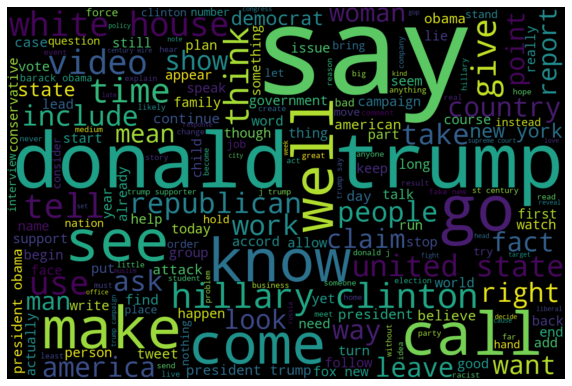

In [25]:
#2 WordCloud
#A - data of fake news

#wordCloud for fake news after lemmatization
wordc = WordCloud(background_color='black', max_words=200, width =1200, height=800)
wordc.generate(' '.join(all_ds_news[all_ds_news.target == 0].clean_text))

#plot the word cloud
plot.figure(figsize=(10,10))
plot.imshow(wordc,interpolation="bilinear")
plot.axis("off")
plot.show()


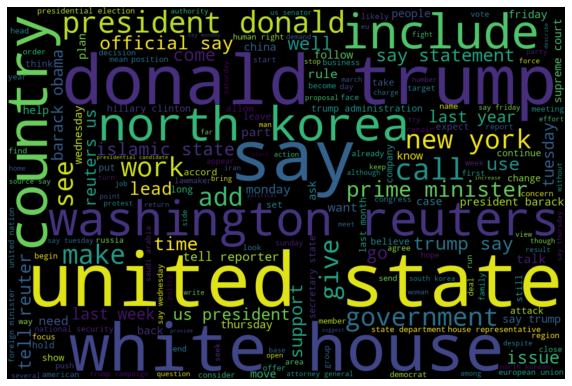

In [26]:
#2 
#B - data of real news
wordc = WordCloud(background_color='black', max_words=200, width =1200, height=800)
wordc.generate(' '.join(all_ds_news[all_ds_news.target == 1].clean_text))
plot.figure(figsize=(10,10))
plot.imshow(wordc,interpolation="bilinear")
plot.axis("off")
plot.show()



say 170245
trump 142975
president 54795
state 43471
people 41996
make 39226
us 38174
year 34878
go 33289
new 32901
take 31949
tell 30946
obama 30246
we 30157
clinton 29796
house 29749
government 29134
donald 28578
reuters 27485
republican 26490


<AxesSubplot:title={'center':'Top 20 words in news'}, xlabel='news', ylabel='Count'>

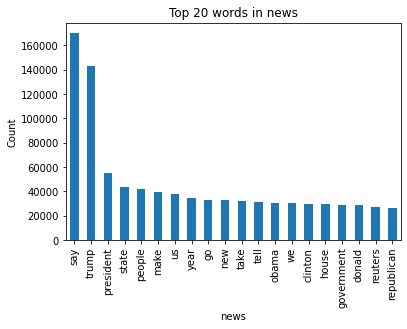

In [27]:
#C top n_gram
#1- Unigram

#gets the top n words from a text corpus. from a list of strings (n:number of top words) and returns a sorted list by a frequency of these words.
#create a function to get top words in the dataset (Unigram)
def get_top_words(corpus, n=None):

    #create CountVectorizer object and fit the vectorizer to the text corpus
    count_vect = CountVectorizer().fit(corpus)
    
    bags_of_word = count_vect.transform(corpus)         #create the bag-of-words representation of the corpus
    words_sum = bags_of_word.sum(axis=0)                #get the word counts for each document

    frequency = [(word, words_sum[0, idx]) for word, idx in count_vect.vocabulary_.items()] #create a list of tuples where each tuple contains a word and its frequency
    frequency =sorted(frequency, key = lambda x: x[1], reverse=True)                    #sort the frequency list by frequency in descending order
    return frequency[:n]                                                                #return the top n words

#call the function and return only top 20 words
top_word = get_top_words(all_ds_news['clean_text'], 20)

#print top 20 word and frequency 
for word, frequency in top_word:
    print(word, frequency)

#create a pandas DataFrame from the top n words by news and sum the count column
ds1 = pd.DataFrame(top_word, columns = ['news' , 'count'])

#plot the top 20 words in a bar chart.
ds1.groupby('news').sum()['count'].sort_values(ascending=False).plot(kind='bar', ylabel='Count', title='Top 20 words in news')


donald trump 26343
united states 16888
white house 15829
hillary clinton 9661
new york 8865
north korea 7259
president donald 6953
washington reuters 6489
trump say 6150
barack obama 5649
last year 5050
president trump 4840
prime minister 4815
official say 4704
last week 4687
supreme court 4646
say statement 4503
fox news 4220
president obama 4183
islamic state 4077


<AxesSubplot:title={'center':'Top 20 words in news'}, xlabel='news', ylabel='Count'>

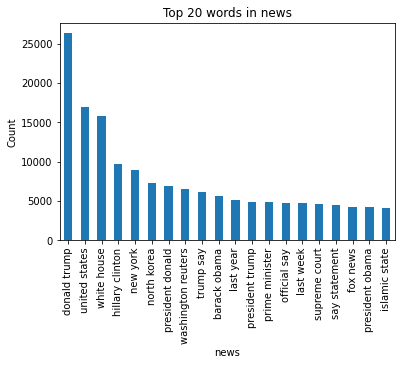

In [28]:
#C top n_gram
#2- bigram
    
#Gets the top n words from a text corpus. from a list of strings (n:number of top words) and returns a sorted list by a frequency of these words.
#create a function to get top words in the dataset (Unigram)
def get_top_words(corpus, n=None):
    count_vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)  

    bags_of_word = count_vect.transform(corpus)
    words_sum = bags_of_word.sum(axis=0)

    frequency = [(word, words_sum[0, idx]) for word, idx in count_vect.vocabulary_.items()]
    frequency =sorted(frequency, key = lambda x: x[1], reverse=True)
    return frequency[:n]

top_word = get_top_words(all_ds_news['clean_text'], 20)

for word, frequency in top_word:
    print(word, frequency)

ds2 = pd.DataFrame(top_word, columns = ['news' , 'count'])

ds2.groupby('news').sum()['count'].sort_values(ascending=False).plot(kind='bar', ylabel='Count', title='Top 20 words in news')


In [29]:
#define clean_text_encoded and target_encoded (from "all dataset news")
clean_text_encoded = all_ds_news['clean_text']
target_encoded = all_ds_news['target']

print(len(clean_text_encoded), len(target_encoded))


44898 44898


In [30]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(clean_text_encoded, target_encoded, test_size=0.2, random_state=1)

print("The number of samples in the train set is:", len(x_train), len(y_train))
print("The number of s amples in the test set is:", len(x_test), len(y_test))


The number of samples in the train set is: 35918 35918
The number of s amples in the test set is: 8980 8980


VECTORIZATION
convert the dataset vocabulary to numbers

### 3. feature extraction

In [31]:
#3. feature extraction
#A- count vectorizer

#first applying count vectorizer then applying the results 
count_vect = CountVectorizer().fit(x_train)


In [32]:
#transform the training and test data
x_train_vec = count_vect.transform(x_train)
x_test_vec = count_vect.transform(x_test)
print(x_train_vec)


  (0, 66)	1
  (0, 336)	1
  (0, 934)	3
  (0, 1108)	1
  (0, 1497)	1
  (0, 1671)	2
  (0, 1839)	1
  (0, 2007)	1
  (0, 2161)	1
  (0, 3101)	1
  (0, 3402)	1
  (0, 3422)	4
  (0, 3696)	1
  (0, 4570)	1
  (0, 5170)	1
  (0, 5453)	1
  (0, 6540)	1
  (0, 7056)	1
  (0, 7280)	1
  (0, 8662)	1
  (0, 10413)	1
  (0, 10834)	3
  (0, 11513)	1
  (0, 12003)	1
  (0, 12511)	1
  :	:
  (35916, 172195)	1
  (35916, 173947)	1
  (35916, 174175)	1
  (35916, 174537)	1
  (35916, 174746)	1
  (35916, 176102)	4
  (35916, 176618)	1
  (35917, 28832)	1
  (35917, 34345)	4
  (35917, 35211)	1
  (35917, 37101)	1
  (35917, 51943)	1
  (35917, 52426)	1
  (35917, 52675)	1
  (35917, 57346)	1
  (35917, 86837)	1
  (35917, 102569)	1
  (35917, 102570)	1
  (35917, 109729)	1
  (35917, 111319)	1
  (35917, 146808)	2
  (35917, 147925)	1
  (35917, 154442)	1
  (35917, 161008)	1
  (35917, 167943)	1


In [33]:
x_train_vec

<35918x178076 sparse matrix of type '<class 'numpy.int64'>'
	with 5462580 stored elements in Compressed Sparse Row format>

In [34]:
#3
#B- TF-IDF

#create TfidfTransformer object
tfidf = TfidfTransformer()
tfidf.fit(x_train_vec)                          #Fit the object to the training data
trans_x_train = tfidf.transform(x_train_vec)    #transform the training data

print(x_train_vec[1])                           #print the first document in the training data


  (0, 956)	1
  (0, 1108)	2
  (0, 5938)	6
  (0, 5946)	1
  (0, 6189)	1
  (0, 6994)	1
  (0, 7753)	1
  (0, 10168)	1
  (0, 10873)	1
  (0, 11340)	2
  (0, 12242)	2
  (0, 16178)	1
  (0, 16179)	4
  (0, 17935)	1
  (0, 18181)	2
  (0, 18903)	1
  (0, 19933)	1
  (0, 21003)	1
  (0, 21403)	1
  (0, 24330)	2
  (0, 24916)	2
  (0, 24924)	1
  (0, 25737)	1
  (0, 26287)	1
  (0, 27526)	1
  :	:
  (0, 157142)	1
  (0, 157490)	1
  (0, 157902)	2
  (0, 159840)	1
  (0, 160618)	1
  (0, 161248)	15
  (0, 161739)	1
  (0, 162058)	1
  (0, 162325)	1
  (0, 162641)	2
  (0, 162978)	2
  (0, 164697)	1
  (0, 166020)	1
  (0, 166327)	1
  (0, 166977)	1
  (0, 167109)	1
  (0, 168536)	1
  (0, 170384)	4
  (0, 171092)	1
  (0, 171388)	1
  (0, 172744)	1
  (0, 174463)	1
  (0, 174537)	1
  (0, 174746)	1
  (0, 175351)	1


In [35]:

print(trans_x_train[1])


  (0, 175351)	0.0734557482995466
  (0, 174746)	0.025543407268032777
  (0, 174537)	0.021505814357011308
  (0, 174463)	0.031093028923321307
  (0, 172744)	0.022215251134929198
  (0, 171388)	0.0257815827388439
  (0, 171092)	0.01902501848493269
  (0, 170384)	0.08523425160585728
  (0, 168536)	0.039074141814856723
  (0, 167109)	0.09883968511969755
  (0, 166977)	0.03887553706509131
  (0, 166327)	0.02128647989996872
  (0, 166020)	0.06740043358532621
  (0, 164697)	0.06359035200147257
  (0, 162978)	0.05929242528040506
  (0, 162641)	0.062349120050215714
  (0, 162325)	0.09883968511969755
  (0, 162058)	0.023992508324193314
  (0, 161739)	0.059559156237090294
  (0, 161248)	0.231989146497239
  (0, 160618)	0.05299628459807022
  (0, 159840)	0.03785412921910111
  (0, 157902)	0.037987221677097505
  (0, 157490)	0.04140948916690062
  (0, 157142)	0.029482783885711458
  :	:
  (0, 27526)	0.02811181696372818
  (0, 26287)	0.029684529494215853
  (0, 25737)	0.05580528348899084
  (0, 24924)	0.06388730732840513
  (0,

In [36]:
#set the vocabulary size
vocab_size = 10000

word_token = Tokenizer(num_words= vocab_size)   #create Tokenizer object
word_token.fit_on_texts(clean_text_encoded)     #fit tokenizer to clean_text_encoded data

#get the vocabulary length
vocab_len = len(word_token.word_index) + 1
vocab_len


198710

In [37]:
#pad_sequences
#often necessary when working with neural networks, as they require all inputs to be of the same size.
#The pad_sequences function takes a list of sequences as input and returns a NumPy array of the same size.

def emb(corpus): 
    return word_token.texts_to_sequences(corpus)

#get the longest sentence in the training data
train_long = max(clean_text_encoded, key=lambda sentence: len(word_tokenize(sentence)))
len_long_s = len(word_tokenize(train_long))

#pad the training data
pad_train_s = pad_sequences(emb(clean_text_encoded), len_long_s, padding='post')
pad_train_s
#test data
test_seq = word_token.texts_to_sequences(clean_text_encoded)
pad_test = pad_sequences(test_seq, maxlen = len_long_s)


In [38]:
#3
#C- GloVe
#First we read in the embeddings file into a dictionary - each entry is a word, followed by the vector of numbers to represent its values

emb_index = dict()
emb = 100

#load the GloVe 100D embeddings
with open('../data/glove.6B.100d.txt', "r", encoding="utf-8") as g:
    for line in g.readlines():
        value = line.split(' ')                            #split the line into a list of words
        word = value[0]                                    #get the word from the first entry in the list
        vect_dim = np.asarray(value[1:], dtype='float32')  #the vecotrs represent the embedding for the word
        emb_index[word] = vect_dim                         #add the word and vector to the dictionary
    g.close()

print('GloVe data loaded')


GloVe data loaded


In [39]:
#create the embedding matrix
emb_matrix = np.zeros((vocab_len,emb))
#fill in the embedding matrix
for word, i in word_token.word_index.items():
    emb_vec = emb_index.get(word)
    if emb_vec is not None:
        emb_matrix[i] = emb_vec

emb_matrix #print the matrix


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.091682  ,  0.58104998,  0.40476999, ..., -0.38741001,
         0.34694999,  0.229     ],
       [-0.15730999, -0.75502998,  0.36844999, ..., -0.54136997,
         0.67817003, -0.17251   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [123]:
#plot confusion matrix
def conf_matrix(z, x=['Real', 'Fake'], y=['Fake', 'Real']):
    z = np.flip(z, 0)

    #change each element of z to type string for annotations, create a text array for the confusion matrix
    z_text = [[str(y) for y in x] for x in z]

    #create the plotly figure object
    figure = figuref.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')
    
    #Set the titles of the plot, x-axis and y-axis
    figure.update_layout(title_text='Confusion matrix')
    figure.update_layout(xaxis = dict(title='Real value'))
    figure.update_layout(yaxis = dict(title='Predicted value'))

    #show colorbar 
    figure['data'][0]['showscale'] = True
    return figure

# 4. ML

In [41]:
#4.1 MNB
#create Multinomial Naive Bayes object 
mnb = MultinomialNB()
mnb.fit(x_train_vec, y_train)               #fit to the training data
pred_value_mnb = mnb.predict(x_test_vec)    #predict the labels for the test data

#get predicted probabilities of the MultinomialNB model
pred_prob_mnb = mnb.predict_proba(x_test_vec)[:, 1]

In [42]:
#calculating auc
acc_value_mnb = roc_auc_score(y_test, pred_value_mnb)
print(acc_value_mnb)


0.95261393479752


In [43]:
#roc auc score
metrics.roc_auc_score(y_test, pred_prob_mnb)


0.9784528070799963

In [126]:
#calculate confusion matrix
print(metrics.accuracy_score(y_test, pred_value_mnb))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_mnb))


0.9524498886414254


In [45]:
#print the classificaation report
print('Classificaation Report:\n', classification_report(y_test,pred_value_mnb))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      4678
           1       0.94      0.96      0.95      4302

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



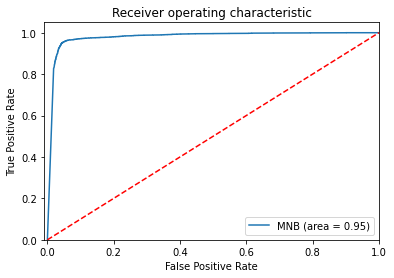

In [124]:
#calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_mnb)

#plot the roc curve 
plot.figure()
plot.plot(fpr, tpr, label='MNB (area = %0.2f)' % acc_value_mnb)
plot.plot([0, 1], [0, 1],'r--')         #plot the line with no discrimination

#set the axes limits
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])

#set the axes labels
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()

In [47]:
#4.2 LR
lr = LogisticRegression(random_state=1, C=1)
lr.fit(x_train_vec, y_train)
pred_value_lr = lr.predict(x_test_vec)
pred_prob_lr = lr.predict_proba(x_test_vec)[:,1]


In [48]:

acc_value_lr = roc_auc_score(y_test, pred_value_lr)
print(acc_value_lr)


0.9953801179005599


In [49]:
metrics.roc_auc_score(y_test,pred_prob_lr)


0.9991383746466291

In [127]:
print(metrics.accuracy_score(y_test,pred_value_lr))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_lr))

0.9953229398663697


In [51]:

print('Classificaation Report:\n', classification_report(y_test,pred_value_lr))


Classificaation Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4678
           1       0.99      1.00      1.00      4302

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



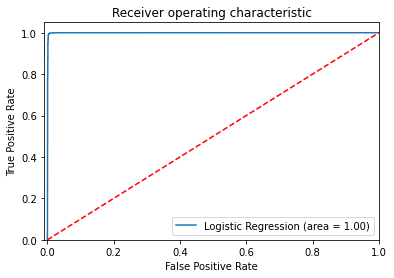

In [52]:

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_lr)
plot.figure()
plot.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % acc_value_lr)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()

In [53]:
#4.3 RF
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train_vec, y_train)
pred_value_rf = rf.predict(x_test_vec)
pred_prob_rf = rf.predict_proba(x_test_vec)[:,1]



In [54]:
acc_value_rf = roc_auc_score(y_test, pred_value_rf)
print(acc_value_rf)


0.98990929380709


In [55]:
metrics.roc_auc_score(y_test,pred_prob_rf)


0.9991599152804634

In [128]:
print(metrics.accuracy_score(y_test,pred_value_rf))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_rf))


0.9898663697104677


In [57]:
print('Classificaation Report:\n', classification_report(y_test,pred_value_rf))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4678
           1       0.99      0.99      0.99      4302

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



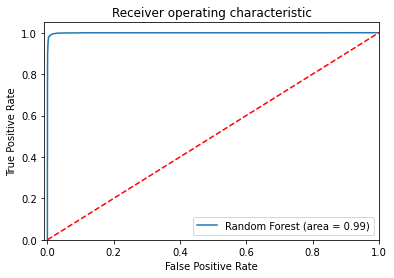

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_rf)
plot.figure()
plot.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % acc_value_rf)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()

In [59]:
#4.4 DT
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train_vec, y_train)
pred_value_dt = dt.predict(x_test_vec)
pred_prob_dt = dt.predict_proba(x_test_vec)[:,1]



In [60]:
acc_value_dt = roc_auc_score(y_test, pred_value_dt)
print(acc_value_dt)


0.996081592243901


In [61]:
metrics.roc_auc_score(y_test,pred_prob_dt)


0.996081592243901

In [129]:
print(metrics.accuracy_score(y_test,pred_value_dt))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_dt))


0.9961024498886414


In [63]:
print('Classificaation Report:\n', classification_report(y_test,pred_value_dt))


Classificaation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4678
           1       1.00      1.00      1.00      4302

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



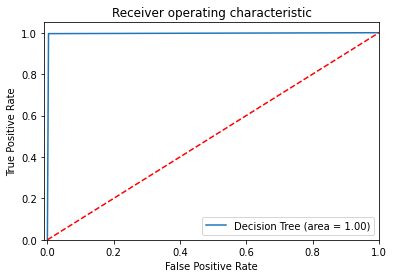

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_dt)
plot.figure()
plot.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % acc_value_dt)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()

In [65]:
#4.5 SVM
svm = LinearSVC(C=0.2, random_state=1)
svm.fit(x_train_vec, y_train)
pred_value_svm = svm.predict(x_test_vec)
#pred_prob_svm = svm.predict_proba(x_test_vec)[:,1]


In [66]:
acc_value_svm = roc_auc_score(y_test, pred_value_svm)
print(acc_value_svm)


0.9953894596287279


In [67]:
#metrics.roc_auc_score(y_test,pred_prob_svm)


In [130]:
print(metrics.accuracy_score(y_test,pred_value_svm))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_svm))


0.9953229398663697


In [69]:
print('Classificaation Report:\n', classification_report(y_test,pred_value_svm))


Classificaation Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4678
           1       0.99      1.00      1.00      4302

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [70]:
#4.6 KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_vec, y_train)
pred_value_knn = knn.predict(x_test_vec)
pred_prob_knn = knn.predict_proba(x_test_vec)[:,1]


In [71]:
acc_value_knn = roc_auc_score(y_test, pred_value_knn)
print(acc_value_knn)


0.8329741240092552


In [72]:
metrics.roc_auc_score(y_test,pred_prob_knn)


0.8638078643040441

In [131]:
print(metrics.accuracy_score(y_test,pred_value_knn))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_knn))


0.8364142538975501


In [74]:

print('Classificaation Report:\n', classification_report(y_test,pred_value_knn))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      4678
           1       0.89      0.75      0.81      4302

    accuracy                           0.84      8980
   macro avg       0.85      0.83      0.83      8980
weighted avg       0.84      0.84      0.83      8980



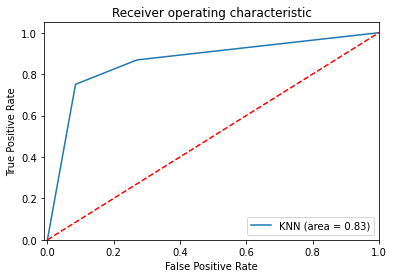

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_knn)
plot.figure()
plot.plot(fpr, tpr, label='KNN (area = %0.2f)' % acc_value_knn)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()


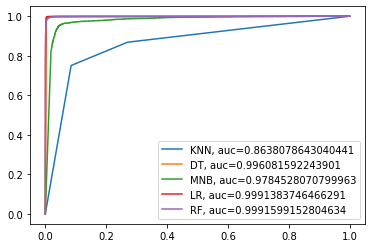

In [132]:
plot.figure(0).clf()

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_knn)
auc = metrics.roc_auc_score(y_test,pred_prob_knn)
plot.plot(fpr,tpr,label="KNN, auc="+str(auc))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_dt)
auc = metrics.roc_auc_score(y_test,pred_prob_dt)
plot.plot(fpr,tpr,label="DT, auc="+str(auc))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_mnb)
auc = metrics.roc_auc_score(y_test,pred_prob_mnb)
plot.plot(fpr,tpr,label="MNB, auc="+str(auc))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_lr)
auc = metrics.roc_auc_score(y_test,pred_prob_lr)
plot.plot(fpr,tpr,label="LR, auc="+str(auc))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_rf)
auc = metrics.roc_auc_score(y_test,pred_prob_rf)
plot.plot(fpr,tpr,label="RF, auc="+str(auc))

plot.legend(loc=0)

# 5. DL

In [77]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pad_train_s, target_encoded, test_size=0.2, random_state=1)

print("The number of samples in the train set is:", len(X_train), len(y_train))
print("The number of s amples in the test set is:", len(X_test), len(y_test))


The number of samples in the train set is: 35918 35918
The number of s amples in the test set is: 8980 8980


In [78]:
#5.1 CNN

cnn = Sequential()
cnn.add(Embedding(vocab_size, emb, input_length= len_long_s))
cnn.add(Conv1D(filters=64, kernel_size=1, padding='same', activation='relu'))
cnn.add(GlobalMaxPool1D())

cnn.add(Dense(32, activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(1, activation='sigmoid'))

#Compiling cnn
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4716, 100)         1000000   
                                                                 
 conv1d (Conv1D)             (None, 4716, 64)          6464      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

In [79]:
#fit
cnn_model1 = cnn.fit(X_train, y_train, epochs= 5, verbose=1, validation_data=(X_test,y_test))


Epoch 1/5
1123/1123 [==============================] - 308s 272ms/step - loss: 0.0569 - accuracy: 0.9847 - val_loss: 0.0136 - val_accuracy: 0.9961
Epoch 2/5
1123/1123 [==============================] - 294s 262ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0111 - val_accuracy: 0.9968
Epoch 3/5
1123/1123 [==============================] - 303s 269ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0097 - val_accuracy: 0.9963
Epoch 4/5
1123/1123 [==============================] - 308s 274ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0120 - val_accuracy: 0.9967
Epoch 5/5
1123/1123 [==============================] - 300s 267ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0137 - val_accuracy: 0.9971


In [114]:
#make a predictions on the test set using CNN
cnn_test_pred = cnn.predict(X_test)

#convert the predicted to binary class labels
cnn_test_pred=np.where(cnn_test_pred>0.5,1,0)

#generate a classification report to show the performance of the model
print('Classificaation Report:\n',classification_report(y_test, cnn_test_pred))


Classificaation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4678
           1       1.00      1.00      1.00      4302

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Text(0.5, 1.0, 'Train - Accuracy')

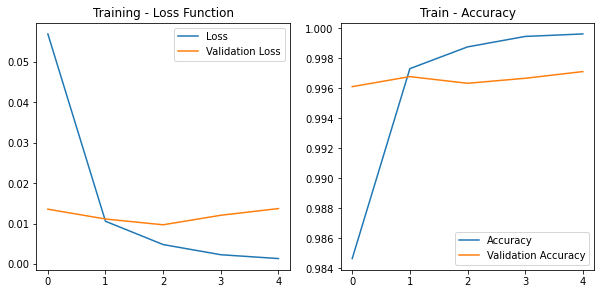

In [81]:
#create a figure with two subplots
plot.figure(figsize=(10, 10))
plot.subplot(2, 2, 1)
#plot the loss function
plot.plot(cnn_model1.history['loss'], label='Loss')
plot.plot(cnn_model1.history['val_loss'], label='Validation Loss')
plot.legend()
plot.title('Training - Loss Function')
#plot the accuracy
plot.subplot(2, 2, 2)
plot.plot(cnn_model1.history['accuracy'], label='Accuracy')
plot.plot(cnn_model1.history['val_accuracy'], label='Validation Accuracy')
#show plot
plot.legend()
plot.title('Train - Accuracy')

In [133]:
#confusion_matrix
print(metrics.accuracy_score(y_test,cnn_test_pred))
conf_matrix(metrics.confusion_matrix(y_test, cnn_test_pred))


0.9971046770601336


In [82]:
print(confusion_matrix(y_test, np.round(cnn_test_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(y_test, np.round(cnn_test_pred)).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")


[[4662   16]
 [  10 4292]]
TP: 4292
FP: 16
TN: 4662
FN: 10


In [84]:
#5.2 LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, output_dim = emb, weights = [emb_matrix] , input_length = len_long_s))
lstm_model.add(LSTM(32, return_sequences= True))
lstm_model.add(Dense(32, activation='relu'))

lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.2))

#lstm_model.add(Dense(1, kernel_regularizer= tf.keras.regularizers.l1(0.003) , activation='linear'))
lstm_model.add(Dense(1,  activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
lstm_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4716, 100)         19871000  
                                                                 
 lstm (LSTM)                 (None, 4716, 32)          17024     
                                                                 
 dense_2 (Dense)             (None, 4716, 32)          1056      
                                                                 
 dense_3 (Dense)             (None, 4716, 64)          2112      
                                                                 
 dropout_1 (Dropout)         (None, 4716, 64)          0         
                                                                 
 dense_4 (Dense)             (None, 4716, 1)           65        
                                                                 
Total params: 19,891,257
Trainable params: 19,891,257


In [85]:
#fitting with 5 epochs and 40 batch_size
lstm_result = lstm_model.fit(X_train, y_train, epochs= 5, batch_size= 40 , verbose=1 , validation_data= (X_test,y_test))


Epoch 1/5
898/898 [==============================] - 3816s 4s/step - loss: 0.2614 - accuracy: 0.8947 - val_loss: 0.0534 - val_accuracy: 0.9903
Epoch 2/5
898/898 [==============================] - 3260s 4s/step - loss: 0.0455 - accuracy: 0.9919 - val_loss: 0.0234 - val_accuracy: 0.9965
Epoch 3/5
898/898 [==============================] - 7289s 8s/step - loss: 0.0260 - accuracy: 0.9960 - val_loss: 0.0181 - val_accuracy: 0.9973
Epoch 4/5
898/898 [==============================] - 4059s 5s/step - loss: 0.0135 - accuracy: 0.9981 - val_loss: 0.0175 - val_accuracy: 0.9976
Epoch 5/5
898/898 [==============================] - 3627s 4s/step - loss: 0.0174 - accuracy: 0.9975 - val_loss: 0.0189 - val_accuracy: 0.9971


In [ ]:
#predicts the labels for the test data using the LSTM model
lstm_test_pred = lstm_model.predict(X_test)

#convert the predicted probabilities to binary labels (0 or 1)
lstm_test_pred=np.where(lstm_test_pred>0.5,1,0)

#generate a classification report to show the performance of the model
print('Classificaation Report:\n',classification_report(y_test, lstm_test_pred))


Text(0.5, 1.0, 'Train - Accuracy')

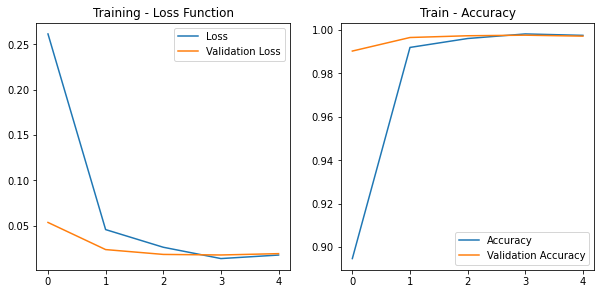

In [88]:
plot.figure(figsize=(10, 10))

plot.subplot(2, 2, 1)
plot.plot(lstm_result.history['loss'], label='Loss')
plot.plot(lstm_result.history['val_loss'], label='Validation Loss')
plot.legend()
plot.title('Training - Loss Function')

plot.subplot(2, 2, 2)
plot.plot(lstm_result.history['accuracy'], label='Accuracy')
plot.plot(lstm_result.history['val_accuracy'], label='Validation Accuracy')
plot.legend()
plot.title('Train - Accuracy')

In [ ]:

print(metrics.accuracy_score(y_test,lstm_test_pred))
conf_matrix(metrics.confusion_matrix(y_test, lstm_test_pred))


In [ ]:
# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(y_test, np.round(lstm_test_pred)))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(y_test, np.round(lstm_test_pred)).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

### 6. Hybrid Approach


In [90]:
#CNN & LSTM 
#combination of CNN-RNN(LSTM)
#output from CNN with Conv1D is used as input for RNN with LSTM (with Lasso Regularization, Dropout)
#model Definition with CNN (Conv1D)
from keras.regularizers import Regularizer

hybrid = Sequential()
hybrid.add(Embedding(vocab_len, output_dim = emb, weights = [emb_matrix] , input_length = len_long_s))
hybrid.add(Conv1D(filters=64, kernel_size=1, padding='same', activation='relu'))

hybrid.add(MaxPooling1D(pool_size=2, padding='same'))
hybrid.add(Bidirectional(LSTM(32)))

hybrid.add(Dense(64, kernel_regularizer= tf.keras.regularizers.l1(0.003) , activation='linear'))
hybrid.add(Dropout(0.5))

hybrid.add(Dense(1, activation='linear'))

hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
hybrid.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4716, 100)         19871000  
                                                                 
 conv1d_1 (Conv1D)           (None, 4716, 64)          6464      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2358, 64)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [91]:
#fit
h_result = hybrid.fit(X_train, y_train, epochs= 5,  verbose=1, validation_data= (X_test,y_test))


Epoch 1/5
1123/1123 [==============================] - 2688s 2s/step - loss: 0.7529 - accuracy: 0.9445 - val_loss: 0.3040 - val_accuracy: 0.9984
Epoch 2/5
1123/1123 [==============================] - 3015s 3s/step - loss: 0.1818 - accuracy: 0.9984 - val_loss: 0.0860 - val_accuracy: 0.9982
Epoch 3/5
1123/1123 [==============================] - 1881s 2s/step - loss: 0.0703 - accuracy: 0.9973 - val_loss: 0.0416 - val_accuracy: 0.9983
Epoch 4/5
1123/1123 [==============================] - 1933s 2s/step - loss: 0.0287 - accuracy: 0.9989 - val_loss: 0.0242 - val_accuracy: 0.9986
Epoch 5/5
1123/1123 [==============================] - 1877s 2s/step - loss: 0.0202 - accuracy: 0.9993 - val_loss: 0.0202 - val_accuracy: 0.9987


In [118]:

h_test_pred = hybrid.predict(X_test)
h_test_pred=np.where(h_test_pred>0.5,1,0)
print('Classificaation Report:\n',classification_report(y_test, h_test_pred))


Classificaation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4678
           1       1.00      1.00      1.00      4302

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Text(0.5, 1.0, 'Train - Accuracy')

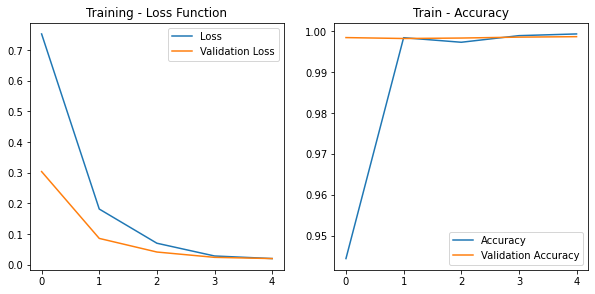

In [93]:
plot.figure(figsize=(10, 10))

plot.subplot(2, 2, 1)
plot.plot(h_result.history['loss'], label='Loss')
plot.plot(h_result.history['val_loss'], label='Validation Loss')
plot.legend()
plot.title('Training - Loss Function')

plot.subplot(2, 2, 2)
plot.plot(h_result.history['accuracy'], label='Accuracy')
plot.plot(h_result.history['val_accuracy'], label='Validation Accuracy')
plot.legend()
plot.title('Train - Accuracy')

In [134]:
#confusion_matrix
print(metrics.accuracy_score(y_test,h_test_pred))
conf_matrix(metrics.confusion_matrix(y_test, h_test_pred))


0.9986636971046771


In [119]:

print(confusion_matrix(y_test, np.round(h_test_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(y_test, np.round(h_test_pred)).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

[[4673    5]
 [   7 4295]]
TP: 4295
FP: 5
TN: 4673
FN: 7
